# Analyzing Amazon Top 50 Best Selling Books
Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.Aim of this project is to analyze the data using python.

In [3]:
#import data analsis libraries
import numpy as np
import pandas as pd

In [2]:
#import visualziaztion libraies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# set the data frame equal to a variable
ama = pd.read_csv('bestsellers with categories.csv')

In [7]:
#shows the first 5 coulmns and rows
ama.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
#Shows descriptive statistics data
ama.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
ama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [10]:
#sort the values of the 10 books in a ascending order from top to bottom by reviews. 
top10 = ama.sort_values('Reviews',ascending=False)[:10]

In [11]:
top10

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


<AxesSubplot:xlabel='Genre', ylabel='User Rating'>

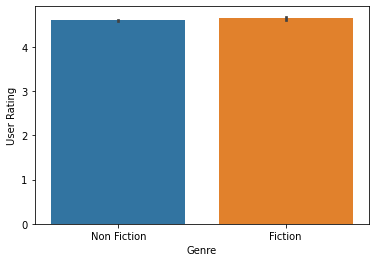

In [12]:
#I used seaborn to graph the genre and the user ratings.
#From the graph i can see that fiction is more popular than non-fiction on Amazon
sns.barplot(x ='Genre', y = 'User Rating',data = ama)

<AxesSubplot:xlabel='User Rating', ylabel='count'>

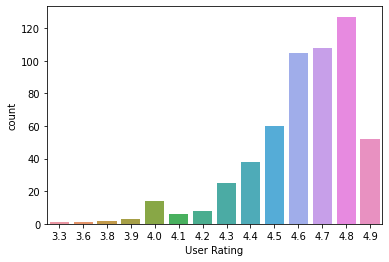

In [13]:
#shows a visual reapresentation of user rating
sns.countplot(x = ama['User Rating'])

In [14]:
#Used pandas to extract data from the column user ratings that is equal to 4.9
#I used the groupby function to group author and user rating coulmn.
#Shows the top authors with the highest ratings.
bestsellers = ama[ama['User Rating']==4.9]
bestsellers = bestsellers.groupby('Author')['User Rating']

In [1]:
bestsellers

NameError: name 'bestsellers' is not defined

In [16]:
# I made the new year set to years from 2009-2019.
#I used the mean() function to give the average of the other numeric columns.
#Reset index to reset the index after making modifications to the column
pyear = ama.groupby('Year').mean().reset_index()
pyear['Year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
pyear

,Year,User Rating,Reviews,Price
0,2009,4.584,4710.12,15.40
1,2010,4.558,5479.62,13.48
2,2011,4.558,8100.82,15.10
3,2012,4.532,13090.92,15.30
4,2013,4.554,13098.14,14.60
5,2014,4.622,15859.94,14.64
6,2015,4.648,14233.38,10.42
7,2016,4.678,14196.00,13.18
8,2017,4.660,12888.40,11.38
9,2018,4.668,13930.42,10.52


<AxesSubplot:xlabel='Year', ylabel='Price'>

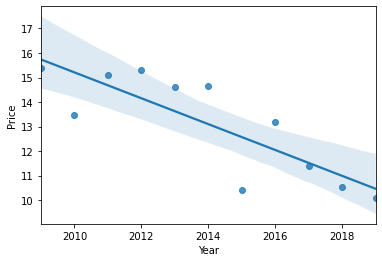

In [19]:
#plots the linear regression model of the data from x and y.
#From the data the amazon price of books declined as the years went on.
sns.regplot(x="Year", y="Price",data=pyear)